In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from sklearn import svm, metrics

In [20]:
trainfile="../test python/train.csv"
testfile="../test python/test.csv"
traindata=pd.read_csv(trainfile)
testdata=pd.read_csv(testfile)

In [21]:
traindata_label=traindata.iloc[:,0].values
traindata=traindata.iloc[:,1:].values
traindata=traindata.astype(np.float)
traindata=np.multiply(traindata,1.0/255.0)

testdata=testdata.iloc[:,:].values
testdata=testdata.astype(np.float)
testdata=np.multiply(testdata,1.0/255.0)
print(traindata.shape, testdata.shape)

(42000, 784) (28000, 784)


In [24]:
img_hight=img_width=np.ceil(np.sqrt(traindata.shape[1])).astype(np.uint8)

In [78]:
def shapetoimage(data):
    data_images=np.zeros((data.shape[0],img_hight,img_width))
    for i in range(data.shape[0]):
        data_images[i]=data[i].reshape(img_hight,img_width)
    return data_images

In [121]:
train_images=shapetoimage(traindata)
def imshow(imgs):
    n=len(imgs)
    if n==1:
        plt.axis("off")
        plt.imshow(imgs[0], cmap=cm.binary)
    else:
        sqrt_n=int(np.ceil(np.sqrt(n)))
        fig, axs=plt.subplots(sqrt_n,sqrt_n)
        axs_flat=axs.flatten()
        for img, ax in zip(imgs,axs_flat):
            ax.axis("off")
            ax.imshow(img,cmap=cm.binary)
        for ax in axs_flat[n:]:
            fig.delaxes(ax)   

[[1 0 1 4]
 [0 0 7 3]
 [5 3 8 9]
 [1 3 3 1]]


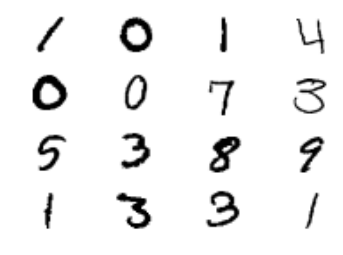

In [124]:
imshow(train_images[:16])
print(traindata_label[:16].reshape(4,4))

In [126]:
ValidationSize=2000
ValidationData=traindata[:ValidationSize]
ValidationLabel=traindata_label[:ValidationSize]
traindata_SVC=traindata[ValidationSize:]
traindata_label_SVC=traindata_label[ValidationSize:]
traindata_label_SVC.shape

(40000,)

In [151]:
LearnNum=svm.SVC()
LearnNum.fit(traindata_SVC,traindata_label_SVC)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [152]:
PredictLabel=LearnNum.predict(ValidationData)

In [133]:
PredictLabel

array([1, 0, 1, ..., 5, 5, 4])

In [134]:
ValidationLabel

array([1, 0, 1, ..., 5, 5, 4])

In [153]:
print("Classification report for LearnNum %s:\n%s\n"
      % (LearnNum, metrics.classification_report(ValidationLabel, PredictLabel)))

Classification report for LearnNum SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       196
          1       0.95      0.96      0.95       217
          2       0.95      0.92      0.93       237
          3       0.89      0.92      0.91       173
          4       0.93      0.96      0.94       203
          5       0.93      0.89      0.91       187
          6       0.95      0.97      0.96       211
          7       0.95      0.94      0.95       194
          8       0.92      0.90      0.91       184
          9       0.92      0.91      0.91       198

avg / total       0.94      0.94      0.94      2000




In [136]:
Predict_testdata=LearnNum.predict(testdata)

[[2 0 9 9 3]
 [7 0 3 0 3]
 [5 7 4 0 4]
 [3 3 1 9 0]
 [9 1 1 5 7]]


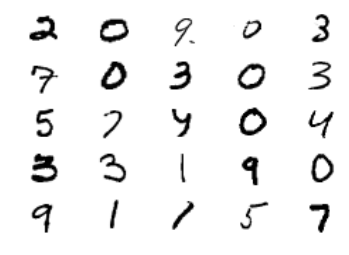

In [137]:
test_images=shapetoimage(testdata)
imshow(test_images[:25])
print(Predict_testdata[:25].reshape(5,5))

In [141]:
Predict_testdata.shape

(300,)